In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import typing

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 31 kB/s 


In [ ]:
import pickle #for saving model
from catboost import CatBoostRegressor
from catboost import Pool

In [ ]:
from google.colab import drive

In [ ]:
drive.mount ('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
path_test = '/content/gdrive/MyDrive/Colab Notebooks/Datasets/Raifhack_DS/data/test.csv'

In [ ]:
path_train = '/content/gdrive/MyDrive/Colab Notebooks/Datasets/Raifhack_DS/data/train.csv'

In [ ]:
df_train = pd.read_csv(path_train)

In [ ]:
df_test = pd.read_csv(path_test)

In [ ]:
df_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
0,Пермь,NaN,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0
1,Шатура,NaN,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0
2,Ярославль,NaN,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0
3,Новокузнецк,NaN,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0
4,Москва,NaN,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0


In [ ]:
features = df_train.columns.to_list()

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279792 entries, 0 to 279791
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 279792 non-null  object 
 1   floor                                103555 non-null  object 
 2   id                                   279792 non-null  object 
 3   lat                                  279792 non-null  float64
 4   lng                                  279792 non-null  float64
 5   osm_amenity_points_in_0.001          279792 non-null  int64  
 6   osm_amenity_points_in_0.005          279792 non-null  int64  
 7   osm_amenity_points_in_0.0075         279792 non-null  int64  
 8   osm_amenity_points_in_0.01           279792 non-null  int64  
 9   osm_building_points_in_0.001         279792 non-null  int64  
 10  osm_building_points_in_0.005         279792 non-null  int64  
 11  osm_building_

In [ ]:
def check_missing_values(df):
    columns = df.columns.values.tolist()
    columns_with_nan = []
    for n in columns:
        if df[n].isna().sum() > 0:
            columns_with_nan.append(n)
            print(f"столбец '{n}' -  пропусков в столбце: {df[n].isna().sum()}")
    return list(columns_with_nan)

In [ ]:
mis_columns = check_missing_values(df_train)

столбец 'floor' -  пропусков в столбце: 176237
столбец 'osm_city_nearest_population' -  пропусков в столбце: 55
столбец 'reform_house_population_1000' -  пропусков в столбце: 14596
столбец 'reform_house_population_500' -  пропусков в столбце: 27234
столбец 'reform_mean_floor_count_1000' -  пропусков в столбце: 16708
столбец 'reform_mean_floor_count_500' -  пропусков в столбце: 30168
столбец 'reform_mean_year_building_1000' -  пропусков в столбце: 16239
столбец 'reform_mean_year_building_500' -  пропусков в столбце: 29637
столбец 'street' -  пропусков в столбце: 1606


In [ ]:
df_train.describe()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type
count,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,2.797370e+05,279792.000000,279792.000000,279792.000000,279792.000000,279792.00000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,2.797920e+05,279792.000000,279792.000000,265196.000000,252558.000000,263084.000000,249624.000000,263553.000000,250155.000000,279792.000000,279792.000000,279792.000000
mean,54.364078,47.763540,2.709084,40.605146,81.596171,133.285458,0.037442,0.885701,2.046467,3.748163,0.614414,8.810970,17.408561,28.341454,15.516565,2.584430e+06,0.519421,0.737344,14.097683,29.307475,48.71462,0.071857,1.487837,3.258067,5.555917,0.145883,2.050423,4.041327,6.442375,2.030673,4.152703,6.836268,1.681188,3.679873,6.225678,1.042767,2.143657,3.555641,2.022713,4.188147,7.047953,0.239188,3.109102,6.216915,10.217090,1.620772,22.637438,44.802353,72.466940,170.930940,9.604875,0.078637,0.196360,0.347601,0.575846,6.262863,12.951189,21.618520,1.101955e+05,100.453691,30.110661,2042.541716,644.610557,7.051233,7.360464,1967.532599,1967.988580,507.833604,54.974088,0.016058
std,4.245713,17.044625,4.202451,53.293388,105.193169,172.290136,0.391014,6.858338,14.801566,25.679859,1.695269,17.713251,33.267316,53.790038,34.755675,4.110835e+06,4.011926,1.386548,15.136481,30.232170,49.24749,0.372920,4.407199,8.815882,13.994591,0.457838,3.371304,6.111080,9.351825,3.331527,6.429165,10.338075,3.908801,7.823028,12.736713,3.312283,6.422509,10.342464,3.042804,5.686815,9.094224,0.737926,5.517670,10.720621,17.458145,2.65

In [ ]:
mis_columns

['floor',
 'osm_city_nearest_population',
 'reform_house_population_1000',
 'reform_house_population_500',
 'reform_mean_floor_count_1000',
 'reform_mean_floor_count_500',
 'reform_mean_year_building_1000',
 'reform_mean_year_building_500',
 'street']

In [ ]:
target = 'per_square_meter_price'

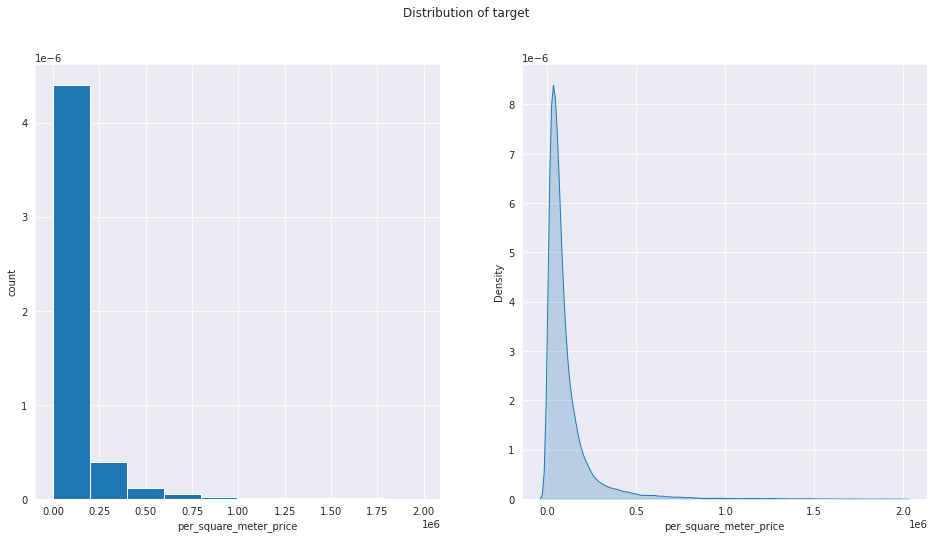

In [ ]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['per_square_meter_price'].hist(density=True)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('per_square_meter_price')

plt.subplot(122)
sns.kdeplot(df_train['per_square_meter_price'], shade=True, legend=False)
plt.xlabel('per_square_meter_price')

plt.suptitle('Distribution of target')
plt.show()

In [ ]:
df_train["per_square_meter_price_log"] = np.log(df_train["per_square_meter_price"])

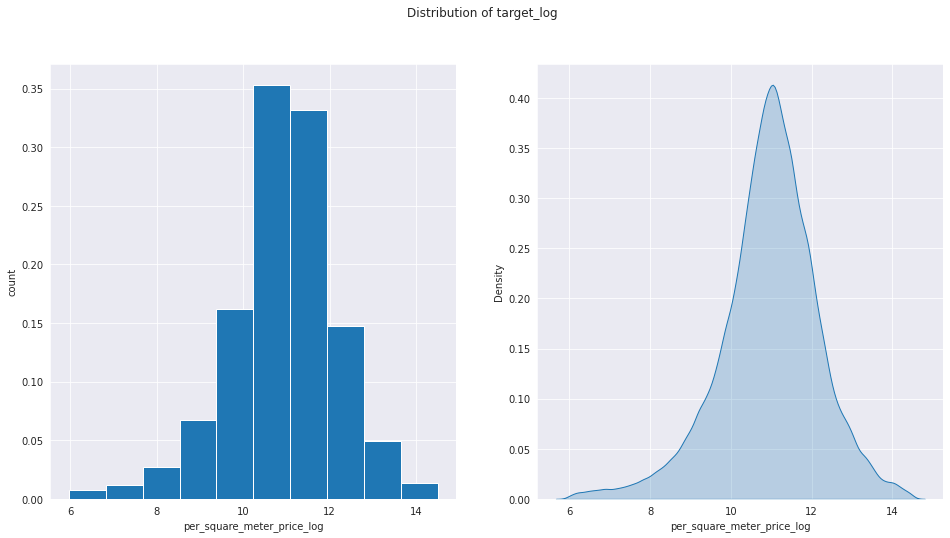

In [ ]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df_train['per_square_meter_price_log'].hist(density=True)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('per_square_meter_price_log')

plt.subplot(122)
sns.kdeplot(df_train['per_square_meter_price_log'], shade=True, legend=False)
plt.xlabel('per_square_meter_price_log')

plt.suptitle('Distribution of target_log')
plt.show()

In [ ]:
(mu, sigma) = norm.fit(df_train['per_square_meter_price_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 10.93 and sigma = 1.23



In [ ]:
# в данный момент можно считать, что 'per_square_meter_price_log' распределеный нормально. 

In [ ]:
df_num_features = df_train.select_dtypes(include=['float64', 'float32', 'int64'])
df_num_features.drop('per_square_meter_price', axis=1, inplace=True)

Важно: целевая переменная распределена логнормально. Лучше всего сделать логорифмирование, обучать логарифм цены на трейне, а потом сделать потенциирование (возведение в степень числа e) 

In [ ]:
skew_features = df_num_features.apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("В датасете {} числовых переменных с  Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

В датасете 60 числовых переменных с  Skew > 0.5 :


osm_crossing_closest_dist          99.732951
osm_transport_stop_closest_dist    91.797894
osm_building_points_in_0.005       28.367982
osm_building_points_in_0.001       26.812293
osm_building_points_in_0.0075      23.840202
osm_building_points_in_0.01        18.743050
osm_train_stop_points_in_0.005     12.253196
total_square                       10.614895
osm_culture_points_in_0.005        10.455274
osm_culture_points_in_0.001         9.518912
dtype: float64

Text(0.5, 0, 'total_square')

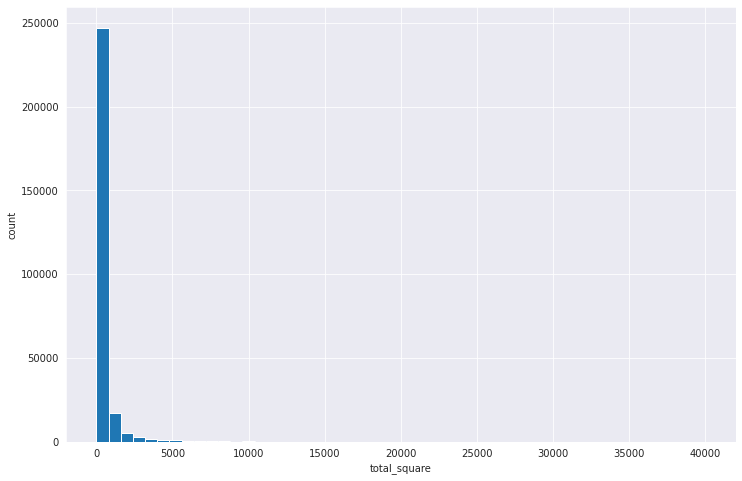

In [ ]:
df_train.loc[:, 'total_square'].hist(figsize=(12, 8), bins=50)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('total_square')

In [ ]:
df_train["total_square_log"] = np.log(df_train["total_square"])

In [ ]:
df_test["total_square_log"] = np.log(df_test["total_square"])

Text(0.5, 0, 'total_square')

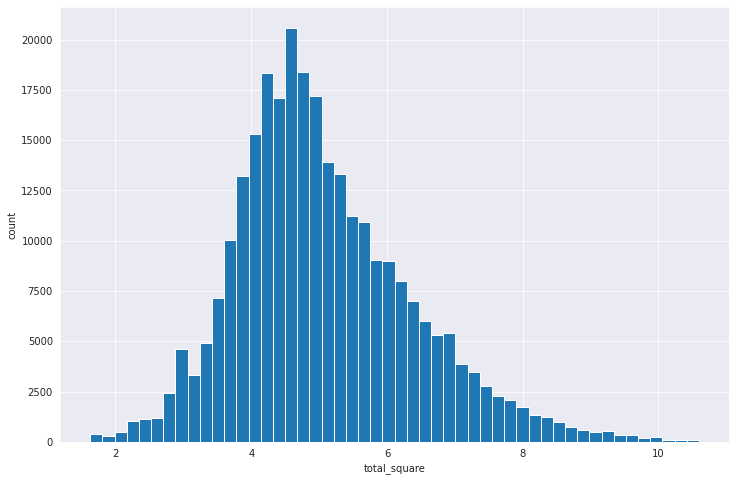

In [ ]:
df_train.loc[:, 'total_square_log'].hist(figsize=(12, 8), bins=50)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('total_square')

In [ ]:
#Отлично, берем этот признак в log. 

In [ ]:
!pip install sklearn

## **Метрика**

In [ ]:
import typing
import numpy as np

THRESHOLD = 0.15
NEGATIVE_WEIGHT = 1.1

def deviation_metric_one_sample(y_true: typing.Union[float, int], y_pred: typing.Union[float, int]) -> float:
    """
    Реализация кастомной метрики для хакатона.

    :param y_true: float, реальная цена
    :param y_pred: float, предсказанная цена
    :return: float, значение метрики
    """
    deviation = (y_pred - y_true) / np.maximum(1e-8, y_true)
    if np.abs(deviation) <= THRESHOLD:
        return 0
    elif deviation <= - 4 * THRESHOLD:
        return 9 * NEGATIVE_WEIGHT
    elif deviation < -THRESHOLD:
        return NEGATIVE_WEIGHT * ((deviation / THRESHOLD) + 1) ** 2
    elif deviation < 4 * THRESHOLD:
        return ((deviation / THRESHOLD) - 1) ** 2
    else:
        return 9


def deviation_metric(y_true, y_pred, isLog=False) -> float:
    if isLog:
        y_pred = np.exp(y_pred)
        y_true = np.exp(y_true)
    return np.array([deviation_metric_one_sample(y_true[n], y_pred[n]) for n in range(len(y_true))]).mean()

def median_absolute_percentage_error(y_true: np.array, y_pred: np.array) -> float:
    return np.median(np.abs(y_pred-y_true)/y_true)

def metrics_stat(y_true: np.array, y_pred: np.array) -> typing.Dict[str,float]:
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mdape = median_absolute_percentage_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    raif_metric = deviation_metric(y_true, y_pred)
    return {'mape':mape, 'mdape':mdape, 'rmse': rmse, 'r2': r2, 'raif_metric':raif_metric}

EPS = 1e-8
assert deviation_metric(np.array([1,2,3,4,5]),np.array([1,2,3,4,5])) <= EPS
assert deviation_metric(np.array([1,2,3,4,5]),np.array([0.9,1.8,2.7,3.6,4.5])) <= EPS
assert deviation_metric(np.array([1,2,3,4,5]),np.array([1.1,2.2,3.3,4.4,5.5])) <= EPS
assert deviation_metric(np.array([1,2,3,4,5]),np.array([1.15,2.3,3.45,4.6,5.75])) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([1.3,2.6,3.9,5.2,6.5]))-1) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([0.7,1.4,2.1,2.8,3.5]))-1*NEGATIVE_WEIGHT) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([10,20,30,40,50]))-9) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([0,0,0,0,0]))-9*NEGATIVE_WEIGHT) <= EPS
assert np.abs(deviation_metric(np.array([1,2,3,4,5]),np.array([1,2.2,3.3,5,50])) - 85/45) <= EPS

In [ ]:
df_train.floor.unique()

array([nan, 3.0, 4.0, -1.0, 1.0, 14.0, 2.0, 8.0, -2.0, 6.0, 10.0, 5.0,
       16.0, 19.0, 7.0, 9.0, 58.0, 24.0, 18.0, 26.0, 17.0, 48.0, 11.0,
       -3.0, 15.0, 22.0, 60.0, 12.0, 21.0, 35.0, 28.0, 38.0, 39.0, 13.0,
       81.0, 44.0, 82.0, 25.0, 45.0, 47.0, 23.0, 37.0, 29.0, 113.0, 78.0,
       42.0, 69.0, 27.0, 46.0, 53.0, 80.0, 70.0, 76.0, 64.0, 30.0, 73.0,
       77.0, 52.0, 67.0, 65.0, 20.0, 40.0, 49.0, 75.0, 93.0, 94.0, 91.0,
       72.0, 79.0, 84.0, 92.0, 33.0, 66.0, 90.0, 31.0, 36.0, 61.0, 71.0,
       68.0, 51.0, 97.0, 43.0, 95.0, 85.0, 50.0, 0.0, 62.0, 54.0, 74.0,
       57.0, 41.0, 34.0, 59.0, 56.0, 123.0, 55.0, 83.0, '27.0', '1.0',
       '5.0', '-1.0', '67.0', '2.0', '0.0', '4.0', '6.0', '3.0', '15.0',
       '10.0', '11.0', '30.0', '12.0', '-2.0', '14.0', '36.0', '8.0',
       '50.0', '17.0', '19.0', '37.0', '68.0', '7.0', '42.0', '9.0',
       '16.0', '20.0', '53.0', '91.0', '84.0', '38.0', '21.0', '48.0',
       '22.0', '23.0', '1', '18.0', 'подвал, 1', '2', 'подвал',
  

In [ ]:
df_test.floor.unique()

array(['1.0', '-1.0', nan, '2,3', '2', '-2.0', '5.0', '4', '1', '5',
       '1, 2', '1,2,3', '2.0', '4.0', '1,2,3,4', 'цоколь', '3', 'подвал',
       '3.0', '11.0', '9.0', '12.0', '0.0', 'цоколь, 1, 2,3,4,5,6', '6',
       '1,2', ' 1, 2, Антресоль', '6.0', '3 этаж, мансарда (4 этаж)',
       'цокольный', '1-й, 2-й', '13', '1, подвал', '7', '1, 2, 3', '1,2 ',
       '14', '9', 'подвал,1', '1-й', '8', '3,4', 'мансарда',
       'подвал, 1 и 4 этаж', '10.0', '5(мансарда)',
       'технический этаж,5,6', ' 1-2, подвальный', '1, 2, 3, мансардный',
       '8.0', '7.0', 'подвал, 1, 2, 3',
       '1,2,3, антресоль, технический этаж', '3, 4', '4, 5',
       '1-3 этажи, цоколь (188,4 кв.м), подвал (104 кв.м)',
       '1,2,3,4, подвал', '2-й', '1, 2 этаж', '1,2,3,4,5', 'подвал, 1, 2',
       '1-7', '1 (по док-м цоколь)', '1-й, подвал', '10', '1,2,подвал ',
       '13.0', 'подвал, 2', '1, цоколь', 'подвал,1,2,3',
       '1,2,3 этаж, подвал', 'цоколь, 1', '2, 3, 4, тех.этаж',
       'цокольный, 1,2'

In [ ]:
df_train.floor = df_train.floor.fillna('unknown')
df_test.floor = df_test.floor.fillna('unknown')

In [ ]:
df_train['floor'] = df_train['floor'].map(lambda x: str(x))
df_test['floor'] = df_test['floor'].map(lambda x: str(x))

In [ ]:
def floor_transformation(df):
  for floor in df.floor.unique():
    try: 
      floor_ = float(floor)
      if floor_<=0:
        df.loc[df['floor'] == floor, 'New_floor'] = '-1'
      if floor_==1:
        df.loc[df['floor'] == floor, 'New_floor'] = '1'
      if floor_==2:
        df.loc[df['floor'] == floor, 'New_floor'] = '2'
      if floor_ >= 3 and floor_ <5:
        df.loc[df['floor'] == floor, 'New_floor'] = '3'
      if floor_>=5 and floor_ <10:
        df.loc[df['floor'] == floor, 'New_floor'] = '4'
      if floor_>=10 and floor_<20:
        df.loc[df['floor'] == floor, 'New_floor'] = '5'
      if floor_>=20 and floor_<50:
        df.loc[df['floor'] == floor, 'New_floor'] = '6'
      if floor_>=50 and floor_<90:
        df.loc[df['floor'] == floor, 'New_floor'] = '7'
      if floor_>=90 and floor_<130:
        df.loc[df['floor'] == floor, 'New_floor'] = '8'
    except:
      floor_ = floor.lower()
      if 'подвал' or 'подва' in floor_:
        df.loc[df['floor'] == floor, 'New_floor'] = 'подвал'
      if 'цоколь' in floor_:
        df.loc[df['floor'] == floor, 'New_floor'] = 'цоколь'
      if 'мансарда' in floor_:
        df.loc[df['floor'] == floor, 'New_floor'] = 'мансарда'
      if 'unknown' in floor_:
        df.loc[df['floor'] == floor, 'New_floor'] = 'unknown'
  return df

In [ ]:
df_train = floor_transformation(df_train)

In [ ]:
df_test = floor_transformation(df_test)

In [ ]:
df_train.New_floor.unique()

array(['unknown', '3', '-1', '1', '5', '2', '4', '7', '6', '8', 'подвал',
       'цоколь', 'мансарда', nan], dtype=object)

In [ ]:
df_test.New_floor.unique()

array(['1', '-1', 'unknown', 'подвал', '2', '4', '3', 'цоколь', '5',
       'мансарда'], dtype=object)

In [ ]:
df_train['New_floor'] = df_train['New_floor'].fillna('unknown')

## **Заполняем пропуски**

'osm_city_nearest_population'

In [ ]:
['floor',
 'osm_city_nearest_population',
 'reform_house_population_1000',
 'reform_house_population_500',
 'reform_mean_floor_count_1000',
 'reform_mean_floor_count_500',
 'reform_mean_year_building_1000',
 'reform_mean_year_building_500',
 'street']

['floor',
 'osm_city_nearest_population',
 'reform_house_population_1000',
 'reform_house_population_500',
 'reform_mean_floor_count_1000',
 'reform_mean_floor_count_500',
 'reform_mean_year_building_1000',
 'reform_mean_year_building_500',
 'street']

Text(0.5, 0, 'osm_city_nearest_population')

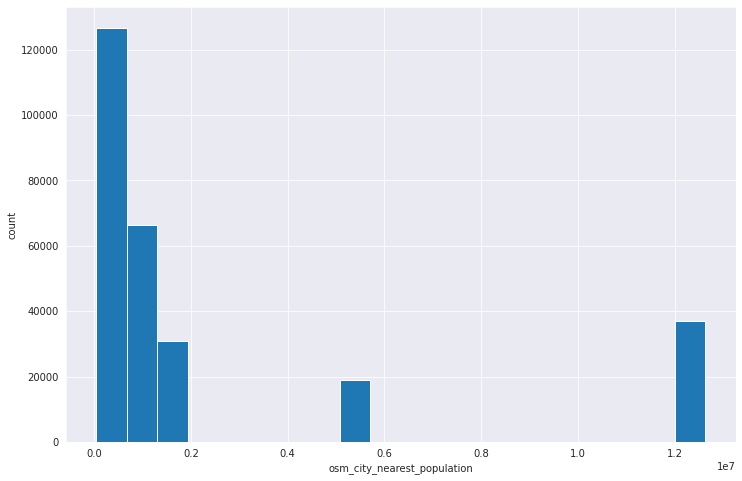

In [ ]:
df_train.loc[:, 'osm_city_nearest_population'].hist(figsize=(12, 8), bins=20)  # density=True  # shift + Tab = спарвка по функции
plt.ylabel('count')
plt.xlabel('osm_city_nearest_population')

Text(0.5, 0, 'osm_city_nearest_population')

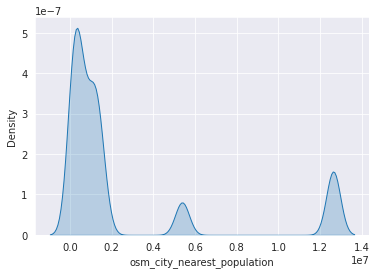

In [ ]:
sns.kdeplot(df_train['osm_city_nearest_population'], shade=True, legend=False)
plt.xlabel('osm_city_nearest_population')

In [ ]:
df_train['osm_city_nearest_population'] = df_train['osm_city_nearest_population'].fillna(0)

In [ ]:
df_train['osm_city_nearest_population'].isna().sum()

0

In [ ]:
df_test['osm_city_nearest_population'].isna().sum()

0

'City'

In [ ]:
df_train['street'].isna().sum()

1606

In [ ]:
df_train['street'].value_counts()

S12711    4991
S24233    2668
S20099    2249
S14617    1785
S9675     1446
          ... 
S26859       1
S14622       1
S28935       1
S16652       1
S29229       1
Name: street, Length: 28841, dtype: int64

In [ ]:
df_train['street'] = df_train['street'].fillna('S_unk')

In [ ]:
df_test['street'] = df_test['street'].fillna('S_unk')

In [ ]:
df_train['street'].isna().sum()

0

In [ ]:
df_test['street'].isna().sum()

0

Переведем realty type в категориальные переменные. 

In [ ]:
df_train['realty_type'] = df_train['realty_type'].apply(str)

In [ ]:
# Создадим edu_train в котором будут только "оценщики" (price_type=1)

In [ ]:
edu_train = df_train[df_train['price_type'] == 1]

In [ ]:
#наиболее высокая корреляция между 'log_per_square' и другими переменными

In [ ]:
k=10

In [ ]:
corrmat = edu_train.corr()

In [ ]:
cols = corrmat.nlargest(k, 'per_square_meter_price_log')['per_square_meter_price_log'].index

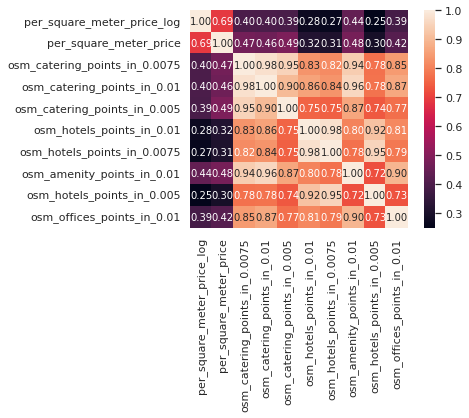

In [ ]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#Попробовал объединить эти переменные через MiniBatchKmeans - только хуже. Скор не прибавился. 

In [ ]:
#Оставляем top-10 из osm

## Binning для price-per-meter

In [ ]:
df_train['per_square_meter_price_log'].describe()

count    279792.000000
mean         10.932085
std           1.228818
min           5.965147
25%          10.298953
50%          10.997266
75%          11.689397
max          14.503645
Name: per_square_meter_price_log, dtype: float64

In [ ]:
#шаг для классов

In [ ]:
value_bins = np.linspace(min(df_train['per_square_meter_price_log']), max(df_train['per_square_meter_price_log']), num=10)

In [ ]:
value_bins

array([ 5.96514724,  6.91386923,  7.86259123,  8.81131322,  9.76003522,
       10.70875722, 11.65747921, 12.60620121, 13.5549232 , 14.5036452 ])

In [ ]:
step = (max(df_train['per_square_meter_price_log']) - min(df_train['per_square_meter_price_log']))/10

In [ ]:
step

0.8538497957910067

In [ ]:
spam = min(df_train['per_square_meter_price_log'])

In [ ]:
spam + step

6.818997034581615

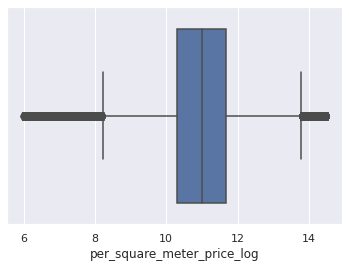

In [ ]:
sns.boxplot(df_train['per_square_meter_price_log'])

In [ ]:
bin_log_price = {1: [value_bins[0], value_bins[1]], 
               2: [value_bins[1], value_bins[2]], 
               3: [value_bins[2], value_bins[3]],
               4: [value_bins[3], value_bins[4]],
               5: [value_bins[4], value_bins[5]],
               6: [value_bins[5], value_bins[6]],
               7: [value_bins[6], value_bins[7]],
               8: [value_bins[7], value_bins[8]],
               9: [value_bins[8], value_bins[9]]}

In [ ]:
bin_log_price

{1: [5.965147238790609, 6.91386923411395],
 2: [6.91386923411395, 7.862591229437291],
 3: [7.862591229437291, 8.811313224760632],
 4: [8.811313224760632, 9.76003522008397],
 5: [9.76003522008397, 10.708757215407314],
 6: [10.708757215407314, 11.657479210730653],
 7: [11.657479210730653, 12.606201206053994],
 8: [12.606201206053994, 13.554923201377335],
 9: [13.554923201377335, 14.503645196700676]}

In [ ]:
for value in bin_log_price.values(): 
  value = list(value)

In [ ]:
bin_log_price

{1: [5.965147238790609, 6.91386923411395],
 2: [6.91386923411395, 7.862591229437291],
 3: [7.862591229437291, 8.811313224760632],
 4: [8.811313224760632, 9.76003522008397],
 5: [9.76003522008397, 10.708757215407314],
 6: [10.708757215407314, 11.657479210730653],
 7: [11.657479210730653, 12.606201206053994],
 8: [12.606201206053994, 13.554923201377335],
 9: [13.554923201377335, 14.503645196700676]}

In [ ]:
for log_pr in edu_train.per_square_meter_price_log.unique():
  for i in range(len(value_bins)-1):
    if log_pr>value_bins[i] and log_pr<value_bins[i+1]:
      edu_train.loc[df_train['per_square_meter_price_log'] == log_pr, 'class_price'] = i


In [ ]:
edu_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,...,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,per_square_meter_price_log,total_square_log,New_floor,class_price
275299,Красноярск,unknown,COL_62,56.063615,92.958428,0,7,14,26,0,0,0,0,0,0,0,2,7.795659,Красноярск,1095286.0,0.041323,2,6,25,35,0,0,0,2,0,1,2,3,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,5,10,15,1.087101,2.281425,0,0,0,0.052809,7,15,21,103120.697310,95,31,2670.0,940.0,7.136842,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,S5845,2020-01-05,110,1,11.543655,4.666746,unknown,5.0
275300,Саратов,unknown,COL_71,51.534581,46.020549,13,198,345,462,0,0,0,0,4,44,66,89,0.987160,Саратов,842097.0,0.144936,0,4,34,59,0,1,6,9,0,13,22,27,7,17,27,4,7,9,2,...,7,11,16,20,1,11,21,28,8,125,218,286,357.425239,1.924421,0,0,0,0.045451,22,34,45,24874.371004,502,104,4886.0,943.0,4.144608,4.164557,1940.591549,1939.348837,Саратовская область,175.039602,S27968,2020-01-05,10,1,10.121593,5.165012,unknown,4.0
275301,Красноярск,unknown,COL_140,56.026884,92.818323,3,15,23,33,0,0,0,0,0,1,3,4,3.730568,Красноярск,1095286.0,0.141526,0,16,35,56,0,0,0,0,2,3,3,3,0,1,1,3,3,3,0,...,1,2,2,2,0,2,2,3,1,5,10,18,1.621353,0.579096,0,0,2,0.223787,6,11,18,80058.148547,175,66,4282.0,1445.0,6.851429,5.742424,1976.714286,1972.878788,Красноярский край,89.534921,S23597,2020-01-05,10,1,11.290509,4.494629,unknown,5.0
275302,Иркутск,unknown,COL_202,52.275528,104.251444,0,10,26,40,0,1,1,1,0,2,6,8,2.344310,Иркутск,623562.0,0.281491,0,6,6,6,0,0,0,0,0,0,0,1,0,4,4,0,0,0,0,...,2,1,2,2,0,1,1,1,0,5,11,21,61.562546,0.813594,0,0,2,0.266067,8,11,19,24649.765045,230,56,1887.0,612.0,4.597222,5.469388,1968.098131,1975.530612,Иркутская область,419.557752,S10587,2020-01-05,10,1,10.112523,6.039201,unknown,4.0
275303,Белгород,unknown,COL_207,50.576545,36.584197,4,48,73,92,0,0,6,6,1,7,11,15,2.170184,Белгород,384425.0,0.065996,1,19,28,46,1,5,10,11,0,2,2,4,3,3,4,2,2,2,0,...,2,10,11,15,0,0,0,0,1,19,29,36,555.411948,2.505330,0,0,0,0.092583,7,17,22,39135.228322,131,35,3837.0,1073.0,9.157480,9.088235,1983.125984,1980.470588,Белгородская область,1098.703185,S11220,2020-01-05,10,1,10.574778,7.001886,unknown,4.0


In [ ]:
for log_pr in df_train.per_square_meter_price_log.unique():
  for i in range(len(value_bins)-1):
    if log_pr>value_bins[i] and log_pr<value_bins[i+1]:
      df_train.loc[df_train['per_square_meter_price_log'] == log_pr, 'class_price'] = i

In [ ]:
df_train['class_price'] = df_train.class_price.fillna(0)

In [ ]:
df_train.class_price.isnull().sum()

0

## Target encoding and class encoding by geo

In [ ]:
df_train[['lat', 'lng', 'per_square_meter_price_log']].head()

,lat,lng,per_square_meter_price_log
0,57.998207,56.292797,11.848951
1,55.574284,39.543835,11.008922
2,57.619140,39.850525,10.718072
3,53.897083,87.108604,10.268313
4,55.802590,37.487110,9.489682


In [ ]:
df_train['latitude'] = np.round(df_train['lat'], 0)
df_train['longitude'] = np.round(df_train['lng'], 0)
df_train[['latitude', 'longitude', 'per_square_meter_price_log']].head()

,latitude,longitude,per_square_meter_price_log
0,58.0,56.0,11.848951
1,56.0,40.0,11.008922
2,58.0,40.0,10.718072
3,54.0,87.0,10.268313
4,56.0,37.0,9.489682


In [ ]:
df_test['latitude'] = np.round(df_test['lat'], 0)
df_test['longitude'] = np.round(df_test['lng'], 0)

In [ ]:
df_train[['latitude', 'longitude']].drop_duplicates().shape[0]

668

In [ ]:
df_g = df_train.groupby(['latitude', 'longitude'])['per_square_meter_price_log'].mean().to_dict()


In [ ]:
df_g_std = df_train.groupby(['latitude', 'longitude'])['per_square_meter_price_log'].std().to_dict()

In [ ]:
df_train['target_mean_by_geo'] = df_train.set_index(['latitude', 'longitude']).index.map(df_g)

In [ ]:
df_test['target_mean_by_geo'] = df_test.set_index(['latitude', 'longitude']).index.map(df_g)

In [ ]:
df_train['target_std_by_geo'] = df_train.set_index(['latitude', 'longitude']).index.map(df_g_std)

In [ ]:
df_test['target_std_by_geo'] = df_test.set_index(['latitude', 'longitude']).index.map(df_g_std)

In [ ]:
df_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,...,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,per_square_meter_price_log,total_square_log,New_floor,class_price,latitude,longitude,target_mean_by_geo,target_std_by_geo
0,Пермь,unknown,COL_0,57.998207,56.292797,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,...,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,136,49,2503.0,765.0,5.762963,5.530612,1964.118519,1960.959184,Пермский край,32.0,S27289,2020-01-05,10,0,11.848951,3.465736,unknown,6.0,58.0,56.0,10.572988,0.942479
1,Шатура,unknown,COL_1,55.574284,39.543835,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,...,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,146,37,1336.0,514.0,2.894366,3.527778,1952.321678,1957.222222,Московская область,280.0,S17052,2020-01-05,10,0,11.008922,5.634790,unknown,5.0,56.0,40.0,10.185017,1.097180
2,Ярославль,unknown,COL_2,57.619140,39.850525,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,...,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,105,27,1883.0,573.0,6.141414,7.222222,1968.150000,1973.370370,Ярославская область,297.4,S16913,2020-01-05,110,0,10.718072,5.695078,unknown,5.0,58.0,40.0,10.607445,0.849701
3,Новокузнецк,unknown,COL_3,53.897083,87.108604,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,...,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,75,2,1801.0,54.0,8.581081,9.000000,1992.716216,2014.000000,Кемеровская область,190.0,S10148,2020-01-05,110,0,10.268313,5.247024,unknown,4.0,54.0,87.0,9.959863,1.080528
4,Москва,unknown,COL_4,55.802590,37.487110,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,...,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,144,38,3090.0,619.0,7.263889,5.684211,1963.229167,1960.500000,Москва,60.2,S1338,2020-01-05,10,0,9.489682,4.097672,unknown,3.0,56.0,37.0,11.678069,0.898752


In [ ]:
df_g_class = df_train.groupby(['latitude', 'longitude'])['class_price'].mean().to_dict()

In [ ]:
df_train['class_price_geo'] = df_train.set_index(['latitude', 'longitude']).index.map(df_g_class)

In [ ]:
df_test['class_price_geo'] = df_test.set_index(['latitude', 'longitude']).index.map(df_g_class)

In [ ]:
#датасет по широте, долготе и типу класса

In [ ]:
#for lat_test, long_test in zip(df_test['latitude'], df_test['longitude']):
#  for lat_train, long_train in zip(edu_train['latitude'], edu_train['longitude']):
#    spam=0 
#    count = 0 
#    if lat_test == lat_train and long_test == long_train:
#      spam = edu_train[(edu_train['latitude']==lat_test) & (edu_train['longitude']==long_test)].index
#      for idx in range(len(spam)):
#        df_test['class_price'] = edu_train.loc[spam[idx], 'class_price']

## Continue 


In [ ]:
features_1 = ['city',
              'lat', 'lng',
              'osm_amenity_points_in_0.01', 
'osm_building_points_in_0.01', 
'osm_catering_points_in_0.001', 
'osm_catering_points_in_0.01', 
'osm_city_closest_dist', 
'osm_city_nearest_population', 
'osm_crossing_closest_dist', 
'osm_crossing_points_in_0.001', 
'osm_crossing_points_in_0.01', 
'osm_culture_points_in_0.01', 
'osm_finance_points_in_0.01', 
'osm_healthcare_points_in_0.01', 
'osm_historic_points_in_0.005',
'osm_hotels_points_in_0.01', 
'osm_offices_points_in_0.01',
'osm_shops_points_in_0.01',
'total_square_log', 
 'region',
 'realty_type', 'street',  'New_floor',
 'class_price_geo', 'target_std_by_geo', 'target_mean_by_geo']

In [ ]:
main_model = CatBoostRegressor(iterations=1500,
                                learning_rate=0.015,
                                depth=12,
                                l2_leaf_reg=8,
                                loss_function='RMSE',
                                task_type = 'GPU',
                                early_stopping_rounds= 90,
                                #class_weights=[0.95,0.05],
                                random_seed=42,
                                verbose= 100
                                )

In [ ]:
text_cols = []
categorical_cols = ['city', 'street', 'New_floor', 'region', 'realty_type']

In [ ]:
edu_train = df_train[df_train['price_type'] == 1].reset_index(drop=True).copy()

In [ ]:
edu_train.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,...,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,per_square_meter_price_log,total_square_log,New_floor,class_price,latitude,longitude,target_mean_by_geo,target_std_by_geo,class_price_geo,month
0,Красноярск,unknown,COL_62,56.063615,92.958428,0,7,14,26,0,0,0,0,0,0,0,2,7.795659,Красноярск,1095286.0,0.041323,2,6,25,35,0,0,0,2,0,1,2,3,0,0,0,0,0,1,0,...,0,0,0,5,10,15,1.087101,2.281425,0,0,0,0.052809,7,15,21,103120.697310,95,31,2670.0,940.0,7.136842,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,S5845,2020-01-05,110,1,11.543655,4.666746,unknown,5.0,56.0,93.0,10.744187,0.891938,4.521663,2020-01-01
1,Саратов,unknown,COL_71,51.534581,46.020549,13,198,345,462,0,0,0,0,4,44,66,89,0.987160,Саратов,842097.0,0.144936,0,4,34,59,0,1,6,9,0,13,22,27,7,17,27,4,7,9,2,...,21,28,8,125,218,286,357.425239,1.924421,0,0,0,0.045451,22,34,45,24874.371004,502,104,4886.0,943.0,4.144608,4.164557,1940.591549,1939.348837,Саратовская область,175.039602,S27968,2020-01-05,10,1,10.121593,5.165012,unknown,4.0,52.0,46.0,10.400555,0.775801,4.190679,2020-01-01
2,Красноярск,unknown,COL_140,56.026884,92.818323,3,15,23,33,0,0,0,0,0,1,3,4,3.730568,Красноярск,1095286.0,0.141526,0,16,35,56,0,0,0,0,2,3,3,3,0,1,1,3,3,3,0,...,2,3,1,5,10,18,1.621353,0.579096,0,0,2,0.223787,6,11,18,80058.148547,175,66,4282.0,1445.0,6.851429,5.742424,1976.714286,1972.878788,Красноярский край,89.534921,S23597,2020-01-05,10,1,11.290509,4.494629,unknown,5.0,56.0,93.0,10.744187,0.891938,4.521663,2020-01-01
3,Иркутск,unknown,COL_202,52.275528,104.251444,0,10,26,40,0,1,1,1,0,2,6,8,2.344310,Иркутск,623562.0,0.281491,0,6,6,6,0,0,0,0,0,0,0,1,0,4,4,0,0,0,0,...,1,1,0,5,11,21,61.562546,0.813594,0,0,2,0.266067,8,11,19,24649.765045,230,56,1887.0,612.0,4.597222,5.469388,1968.098131,1975.530612,Иркутская область,419.557752,S10587,2020-01-05,10,1,10.112523,6.039201,unknown,4.0,52.0,104.0,10.580900,0.802999,4.365405,2020-01-01
4,Белгород,unknown,COL_207,50.576545,36.584197,4,48,73,92,0,0,6,6,1,7,11,15,2.170184,Белгород,384425.0,0.065996,1,19,28,46,1,5,10,11,0,2,2,4,3,3,4,2,2,2,0,...,0,0,1,19,29,36,555.411948,2.505330,0,0,0,0.092583,7,17,22,39135.228322,131,35,3837.0,1073.0,9.157480,9.088235,1983.125984,1980.470588,Белгородская область,1098.703185,S11220,2020-01-05,10,1,10.574778,7.001886,unknown,4.0,51.0,37.0,10.7512

In [ ]:
df_test.head()

,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,...,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,lat,lng,total_square,street,date,realty_type,price_type,total_square_log,New_floor,latitude,longitude,target_mean_by_geo,target_std_by_geo,class_price_geo,month,per_square_meter_price
0,Курск,1.0,COL_289284,7,55,85,117,0,0,0,0,0,2,6,10,4.101661,Курск,443212.0,0.147072,0,7,7,19,0,0,0,0,1,2,3,3,5,5,5,2,2,4,7,7,8,...,0,1,5,36,61,83,435.363535,5.636811,0,0,0,0.108668,11,15,27,184,78,1997.0,743.0,4.325000,4.211268,1966.471591,1966.740260,Курская область,51.709255,36.147908,156.148996,S6983,2020-09-06,100,1,5.050811,1,52.0,36.0,10.315580,0.891987,4.101883,2020-09-01,10.603059
1,Сургут,1.0,COL_289305,8,70,112,140,0,0,0,0,0,7,8,13,4.084249,Сургут,380632.0,0.162480,0,18,33,50,0,0,0,1,1,2,5,6,3,6,8,1,1,1,3,5,5,...,5,8,4,51,81,99,693.447931,9.641591,0,0,0,0.091416,9,11,19,118,44,2823.0,1019.0,5.389831,5.500000,1988.259259,1989.068182,Ханты-Мансийский АО,61.233240,73.462509,190.737943,S29120,2020-09-06,110,1,5.250900,1,61.0,73.0,10.784976,0.765699,4.569550,2020-09-01,10.836025
2,Тюмень,-1.0,COL_289318,3,28,67,122,0,0,0,0,0,9,18,34,1.291974,Тюмень,744554.0,0.075807,1,21,57,92,0,0,1,2,0,1,4,5,2,3,3,1,2,5,0,1,1,...,1,3,3,15,34,63,298.904686,1.803999,0,0,0,0.120308,6,20,29,150,51,3484.0,1332.0,7.915493,8.250000,1985.880282,1991.458333,Тюменская область,57.143110,65.554573,457.118051,S23731,2020-09-06,10,1,6.124942,-1,57.0,66.0,10.872439,0.817103,4.668941,2020-09-01,10.604325
3,Иркутск,1.0,COL_289354,5,76,139,231,0,0,0,0,0,28,52,84,0.914598,Иркутск,623562.0,0.043604,1,30,60,95,1,8,13,18,0,5,6,10,5,8,12,12,20,32,1,8,18,...,11,16,3,14,26,51,60.224709,1.338052,0,0,0,0.079332,9,18,29,252,86,1975.0,666.0,3.276860,3.012048,1947.073276,1941.657895,Иркутская область,52.281380,104.282975,66.503622,S14207,2020-09-06,100,1,4.197256,1,52.0,104.0,10.580900,0.802999,4.365405,2020-09-01,11.375076
4,Курск,unknown,COL_289399,8,105,189,279,0,0,2,9,1,24,40,54,1.300135,Курск,443212.0,0.084204,1,40,72,84,1,10,12,12,3,10,14,21,2,6,6,10,14,17,1,1,1,...,12,16,1,49,98,156,432.530106,2.440972,0,0,0,0.093642,12,26,37,114,31,1044.0,394.0,4.346154,4.827586,1948.764151,1946.689655,Курская область,51.729706,36.194019,23.864915,S20658,2020-09-06,10,1,3.172409,unknown,52.0,36.0,10.315580,0.891987,4.101883,2020-09-01,10.901534


In [ ]:
edu_train.shape

(4493, 87)

In [ ]:
df_test.shape

(2974, 84)

In [ ]:
target_log = 'per_square_meter_price_log'

In [ ]:
def cross_validate(df_train, df_test, iterations, cat_features, verbose, n_cv, features):

    catboost_regressor = CatBoostRegressor(iterations=iterations,cat_features=cat_features, random_seed=42, task_type='GPU')
    
    idxs = [[] for i in range(n_cv)]
    for i in range(len(df_test)):
        r = np.random.randint(0, n_cv)
        idxs[r].append(df_test.index[i])
    X_train = pd.DataFrame()
    X_test  = pd.DataFrame()
    y_train = pd.DataFrame()
    y_test  = pd.DataFrame()
    scores = []
    feature_imp_lst = []
    for i in range(len(idxs)):
        print('Iter: ', i)
        train_idxs = []
        for idx in idxs[:i]+idxs[i+1:]:
            train_idxs+=idx
        X_train =  df_train[features].loc[train_idxs, :]
        X_test  =  df_test[features].loc[idxs[i]]
        y_train =  df_train.loc[train_idxs, :].per_square_meter_price_log
        y_test  =  df_train.loc[idxs[i], :].per_square_meter_price_log
        catboost_regressor.fit(X_train, y_train, verbose=verbose, plot=True)
        y_pred = catboost_regressor.predict(X_test)
        #score = deviation_metric(y_test, y_pred, isLog=True)
        #scores.append(score)
        feature_imp_lst.append(catboost_regressor.feature_importances_)
        #print("Score: ", score)   
    #print('Score: ', sum(scores)/len(scores))
    feature_imps = []
    for i in range(len(sum(feature_imp_lst)/len(feature_imp_lst))):
        feature_imps.append((X_train.columns[i], catboost_regressor.feature_importances_[i]))
    feature_imps = sorted(feature_imps, key = lambda x: x[1])
    feature_imps.reverse()
    print('Feature importances')
    print(feature_imps)

In [ ]:
categorical_cols = ['city', 'street', 'New_floor', 'region', 'realty_type']

In [ ]:
df_train, df_test = edu_train[features_1], df_test[features_1]

In [ ]:
iterations=1000
verbose=100
n_cv = 4

catboost_regressor = cross_validate(edu_train, df_test, iterations, categorical_cols, verbose, n_cv, features_1)

Iter:  0


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044879
0:	learn: 0.5723285	total: 49.7ms	remaining: 49.6s
100:	learn: 0.3152223	total: 4.75s	remaining: 42.3s
200:	learn: 0.2952228	total: 9.4s	remaining: 37.4s
300:	learn: 0.2821144	total: 14s	remaining: 32.5s
400:	learn: 0.2742957	total: 18.5s	remaining: 27.7s
500:	learn: 0.2679229	total: 23.1s	remaining: 23s
600:	learn: 0.2626154	total: 27.6s	remaining: 18.3s
700:	learn: 0.2580544	total: 32.2s	remaining: 13.7s
800:	learn: 0.2540894	total: 36.7s	remaining: 9.12s
900:	learn: 0.2499019	total: 41.5s	remaining: 4.56s
999:	learn: 0.2469150	total: 46.2s	remaining: 0us
Iter:  1


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044866
0:	learn: 0.5740231	total: 43.9ms	remaining: 43.8s
100:	learn: 0.3183983	total: 4.23s	remaining: 37.6s
200:	learn: 0.2962418	total: 8.44s	remaining: 33.6s
300:	learn: 0.2810633	total: 12.6s	remaining: 29.3s
400:	learn: 0.2700264	total: 16.9s	remaining: 25.2s
500:	learn: 0.2607348	total: 21.2s	remaining: 21.1s
600:	learn: 0.2542279	total: 25.5s	remaining: 16.9s
700:	learn: 0.2487092	total: 30s	remaining: 12.8s
800:	learn: 0.2433384	total: 34.4s	remaining: 8.55s
900:	learn: 0.2399614	total: 38.9s	remaining: 4.28s
999:	learn: 0.2350670	total: 43.4s	remaining: 0us
Iter:  2


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044821
0:	learn: 0.5680740	total: 48.2ms	remaining: 48.2s
100:	learn: 0.3171119	total: 4.26s	remaining: 37.9s
200:	learn: 0.2969147	total: 8.43s	remaining: 33.5s
300:	learn: 0.2861337	total: 12.5s	remaining: 29s
400:	learn: 0.2771763	total: 16.6s	remaining: 24.8s
500:	learn: 0.2703138	total: 20.8s	remaining: 20.7s
600:	learn: 0.2647774	total: 25s	remaining: 16.6s
700:	learn: 0.2594210	total: 29.2s	remaining: 12.4s
800:	learn: 0.2554716	total: 33.6s	remaining: 8.34s
900:	learn: 0.2521673	total: 38.1s	remaining: 4.19s
999:	learn: 0.2489030	total: 42.6s	remaining: 0us
Iter:  3


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044913
0:	learn: 0.5778521	total: 39.6ms	remaining: 39.6s
100:	learn: 0.3202810	total: 4.25s	remaining: 37.8s
200:	learn: 0.2996864	total: 8.38s	remaining: 33.3s
300:	learn: 0.2872478	total: 12.4s	remaining: 28.9s
400:	learn: 0.2799927	total: 16.1s	remaining: 24.1s
500:	learn: 0.2746650	total: 20.1s	remaining: 20.1s
600:	learn: 0.2686994	total: 24.3s	remaining: 16.1s
700:	learn: 0.2630999	total: 28.6s	remaining: 12.2s
800:	learn: 0.2585764	total: 32.8s	remaining: 8.16s
900:	learn: 0.2552299	total: 37s	remaining: 4.07s
999:	learn: 0.2515688	total: 41.3s	remaining: 0us
Feature importances
[('class_price_geo', 17.891087728229138), ('total_square_log', 14.49553151700671), ('target_mean_by_geo', 7.411685042056917), ('city', 7.288460321880504), ('region', 6.010666266012429), ('osm_catering_points_in_0.001', 5.1843744662839955), ('osm_catering_points_in_0.01', 4.339187266182119), ('New_floor', 4.056931563871821), ('osm_hotels_points_in_0.01', 4.050364724566814), ('lng',

In [ ]:
catboost_regressor = CatBoostRegressor(iterations=iterations,cat_features=categorical_cols, random_seed=42, task_type='GPU')

In [ ]:
catboost_regressor.fit(edu_train[features_1], edu_train['per_square_meter_price_log'], verbose=verbose, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.049181
0:	learn: 0.5737229	total: 47.9ms	remaining: 47.8s
100:	learn: 0.3324279	total: 4.76s	remaining: 42.3s
200:	learn: 0.3178042	total: 9.39s	remaining: 37.3s
300:	learn: 0.3084630	total: 14s	remaining: 32.6s
400:	learn: 0.3018737	total: 18.7s	remaining: 27.9s
500:	learn: 0.2972764	total: 23.3s	remaining: 23.2s
600:	learn: 0.2925607	total: 28.1s	remaining: 18.7s
700:	learn: 0.2881280	total: 32.8s	remaining: 14s
800:	learn: 0.2838618	total: 37.6s	remaining: 9.35s
900:	learn: 0.2798243	total: 42.4s	remaining: 4.66s
999:	learn: 0.2765307	total: 47.2s	remaining: 0us


In [ ]:
df_test_2 = pd.read_csv(path_test)

In [ ]:
test_pred = catboost_regressor.predict(df_test)
df_test_2['per_square_meter_price'] = np.exp(test_pred)

In [ ]:
df_test_2[['id','per_square_meter_price']].to_csv('sub11.csv',header=True,index=False)

In [ ]:
from google.colab import files

In [ ]:
files.download('sub11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
['city',
 'floor',
 'id',
 'osm_city_nearest_name',
 'region',
 'street',
 'realty_type',
 'New_floor']

In [ ]:
categorical_cols = ['city', 'street', 'New_floor', 'region', 'realty_type']

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(edu_train[features_1], edu_train[target_log], test_size = 0.33, random_state = 42)

In [ ]:
train_pool = Pool(
X_train,
y_train,
cat_features=categorical_cols,
text_features=text_cols,
feature_names=features_1,
)


In [ ]:
valid_pool = Pool(
x_test,
y_test,
cat_features=categorical_cols,
text_features=text_cols,
feature_names=features_1,
)

In [ ]:
regr_CB = CatBoostRegressor(iterations= 1500,
learning_rate= 0.015,
depth=12,
l2_leaf_reg=8,
loss_function='RMSE',
task_type = 'CPU',
early_stopping_rounds= 90,
#class_weights=[0.95,0.05],
random_seed=42,
verbose= 100
)

In [ ]:
regr_CB.fit(train_pool, eval_set=valid_pool,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5743574	test: 0.6005062	best: 0.6005062 (0)	total: 132ms	remaining: 3m 18s
100:	learn: 0.3822642	test: 0.4109859	best: 0.4109859 (100)	total: 15.1s	remaining: 3m 29s
200:	learn: 0.3254812	test: 0.3674557	best: 0.3674557 (200)	total: 32.2s	remaining: 3m 28s
300:	learn: 0.2959725	test: 0.3531687	best: 0.3531687 (300)	total: 51.4s	remaining: 3m 24s
400:	learn: 0.2762189	test: 0.3469082	best: 0.3469082 (400)	total: 1m 10s	remaining: 3m 11s
500:	learn: 0.2607660	test: 0.3433971	best: 0.3433971 (500)	total: 1m 29s	remaining: 2m 58s
600:	learn: 0.2486642	test: 0.3410519	best: 0.3410519 (600)	total: 1m 48s	remaining: 2m 42s
700:	learn: 0.2392683	test: 0.3397433	best: 0.3397433 (700)	total: 2m 8s	remaining: 2m 26s
800:	learn: 0.2326488	test: 0.3388535	best: 0.3388535 (800)	total: 2m 27s	remaining: 2m 8s
900:	learn: 0.2266042	test: 0.3380928	best: 0.3380928 (900)	total: 2m 47s	remaining: 1m 51s
1000:	learn: 0.2203152	test: 0.3374708	best: 0.3374708 (1000)	total: 3m 7s	remaining: 1m 3

In [ ]:
features_importance_list = list(regr_CB.feature_importances_)

In [ ]:
for i in range(len(features_1)):
  print(features_1[i],features_importance_list[i])

city 7.971089335026474
lat 2.076005867934777
lng 2.6082146616255004
osm_amenity_points_in_0.01 2.7589968444054853
osm_building_points_in_0.01 0.26719805585749284
osm_catering_points_in_0.001 2.797439569902341
osm_catering_points_in_0.01 2.633986429660798
osm_city_closest_dist 3.9052991994463286
osm_city_nearest_population 1.767119617587328
osm_crossing_closest_dist 4.805325835003238
osm_crossing_points_in_0.001 1.5007391419428833
osm_crossing_points_in_0.01 2.490833163449361
osm_culture_points_in_0.01 1.3364053437109409
osm_finance_points_in_0.01 2.2929539473194263
osm_healthcare_points_in_0.01 1.5731946450139502
osm_historic_points_in_0.005 1.1775867825914041
osm_hotels_points_in_0.01 1.8916779046702237
osm_offices_points_in_0.01 1.237377961113322
osm_shops_points_in_0.01 1.5858511164082802
total_square_log 15.320557286523064
region 7.398445051100162
realty_type 6.2667707615941355
street 2.005650591760567
New_floor 6.980452057105499
class_price_geo 6.5553792559028095
target_std_by_geo

In [ ]:
regr_CB.score(X_train,y_train)

0.8474897532357312

In [ ]:
regr_CB.score(x_test,y_test)

0.6931460385761654

In [ ]:
pred_test = regr_CB.predict(df_test[features_1])

In [ ]:
df_test['per_square_meter_price_log'] = pred_test

In [ ]:
df_test['per_square_meter_price'] = np.exp(df_test['per_square_meter_price_log'])

In [ ]:
df_test[['id','per_square_meter_price']].to_csv('sub09.csv',header=True,index=False)

In [ ]:
!ls

catboost_info  gdrive  sample_data  sub08.csv  sub09.csv


In [ ]:
from google.colab import files

In [ ]:
files.download('sub09.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>